In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import ma
from matplotlib import scale as mscale
from matplotlib import transforms as mtransforms
from matplotlib.ticker import Formatter, FixedLocator
from matplotlib import rcParams
from matplotlib import gridspec

from ZOEE import update_plotstyle
from ZOEE import LatitudeScale
import matplotlib
update_plotstyle()
mscale.register_scale(LatitudeScale)
import seaborn as sns
#matplotlib.rcParams['xtick.minor.size']=0

In [3]:
ZMT_HadCM3=np.genfromtxt('Experiments/Output/HadCM3_ZMT_20_resp_1.txt', delimiter=',',unpack=True)
ZMT_CESM=np.genfromtxt('Experiments/Output/CESM_ZMT_20_resp_1.txt', delimiter=',',unpack=True)
ZMT_Pages=np.genfromtxt('Experiments/Output/Pages_ZMT_20_resp_1.txt', delimiter=',',unpack=True)

In [4]:
Lat_10,ZMT_ERA=np.loadtxt('Experiments/ERA5/ERA_1961_1990_10deg_ZMTanomaly.txt',delimiter=',')

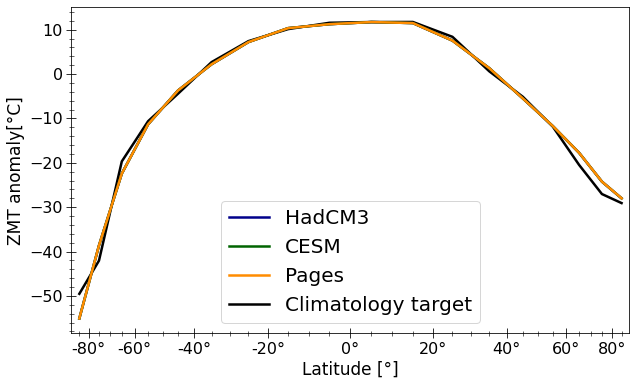

In [5]:
plt.figure(figsize=(10,6))
plt.plot(np.deg2rad(Lat_10),ZMT_HadCM3[:,0],color='darkblue',label='HadCM3',zorder=5)
plt.plot(np.deg2rad(Lat_10),ZMT_CESM[:,0],color='darkgreen',label='CESM',zorder=5)
plt.plot(np.deg2rad(Lat_10),ZMT_Pages[:,0],color='darkorange',label='Pages',zorder=5)
plt.plot(np.deg2rad(Lat_10),ZMT_ERA,'k',label='Climatology target',zorder=-1)
plt.xscale('latarea')
plt.xlabel('Latitude [°]',fontsize=17)
plt.ylabel('ZMT anomaly[°C]',fontsize=17)
#plt.ylim(-36,28)
plt.legend(fontsize=20)
#plt.savefig('../Latex/Figures/Clima_opti.png',format='PNG',dpi=400,bbox_inches='tight',transparency=True)

In [6]:
GMT_HadCM3=np.genfromtxt('Experiments/Output/HadCM3_GMT_20_resp_1.txt', delimiter=',',unpack=True)
GMT_CESM=np.genfromtxt('Experiments/Output/CESM_GMT_20_resp_1.txt', delimiter=',',unpack=True)
GMT_Pages=np.genfromtxt('Experiments/Output/Pages_GMT_20_resp_1.txt', delimiter=',',unpack=True)

In [7]:
Time_HadCM3,Target_HadCM3=np.loadtxt('Experiments/HadCM3/HadCM3_850_1850_anomaly.txt',delimiter=',')
Time_CESM,Target_CESM=np.loadtxt('Experiments/CESM/CESM_850_1850_response.txt',delimiter=',')
Time_Pages,Target_Pages=np.loadtxt('Experiments/Pages2k/Pages2k_850_1850.txt',delimiter=',')

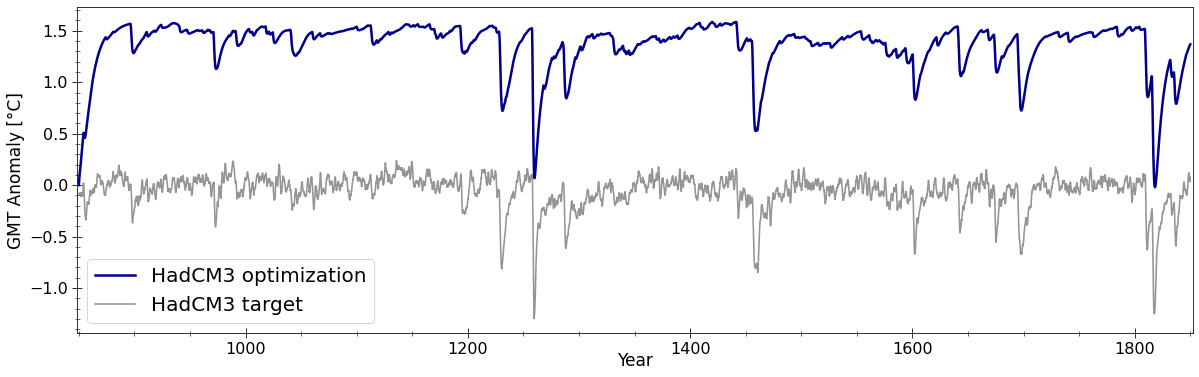

In [9]:
plt.figure(figsize=(20,6))
plt.plot(Time_HadCM3,GMT_HadCM3[:,0],linewidth=2.5,alpha=1,color='darkblue',label='HadCM3 optimization',zorder=5)
plt.plot(Time_HadCM3,Target_HadCM3,color='dimgray',linewidth=1.6,alpha=.7, label='HadCM3 target')
plt.xlim(848,1852)
plt.ylabel('GMT Anomaly [°C]',fontsize=17)
plt.xlabel('Year',fontsize=17,labelpad=-5)
plt.legend(fontsize=20)
#plt.set_yticks([-2,-1.5,-1,-0.5,0.0])
#plt.set_ylim(-3,0.5)
#plt.savefig('../Latex/Figures/Response_opti.png',format='PNG',dpi=400,bbox_inches='tight',transparency=True)

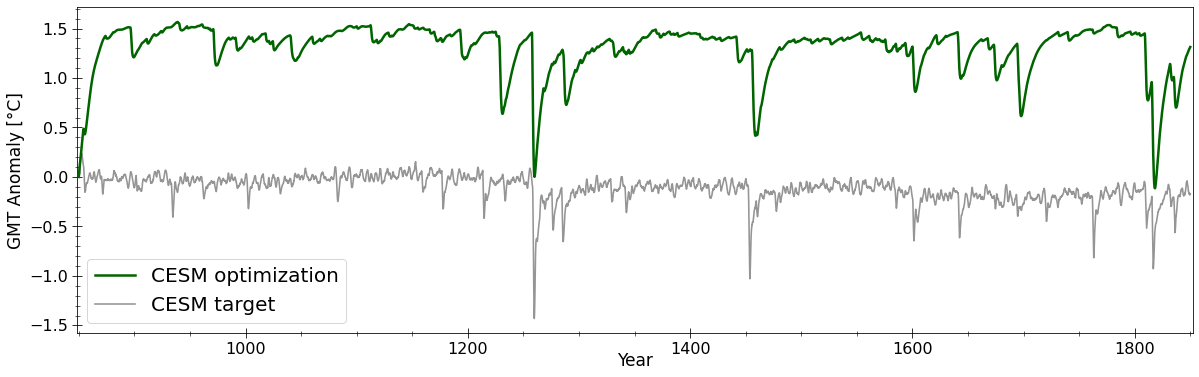

In [10]:
plt.figure(figsize=(20,6))
plt.plot(Time_CESM,GMT_CESM[:,0],linewidth=2.5,alpha=1,color='darkgreen',label='CESM optimization',zorder=5)
plt.plot(Time_CESM,Target_CESM,color='dimgray',linewidth=1.6,alpha=.7, label='CESM target')
plt.xlim(848,1852)
plt.ylabel('GMT Anomaly [°C]',fontsize=17)
plt.xlabel('Year',fontsize=17,labelpad=-5)
plt.legend(fontsize=20)
#plt.set_yticks([-2,-1.5,-1,-0.5,0.0])
#plt.set_ylim(-3,0.5)
#plt.savefig('../Latex/Figures/Response_opti.png',format='PNG',dpi=400,bbox_inches='tight',transparency=True)

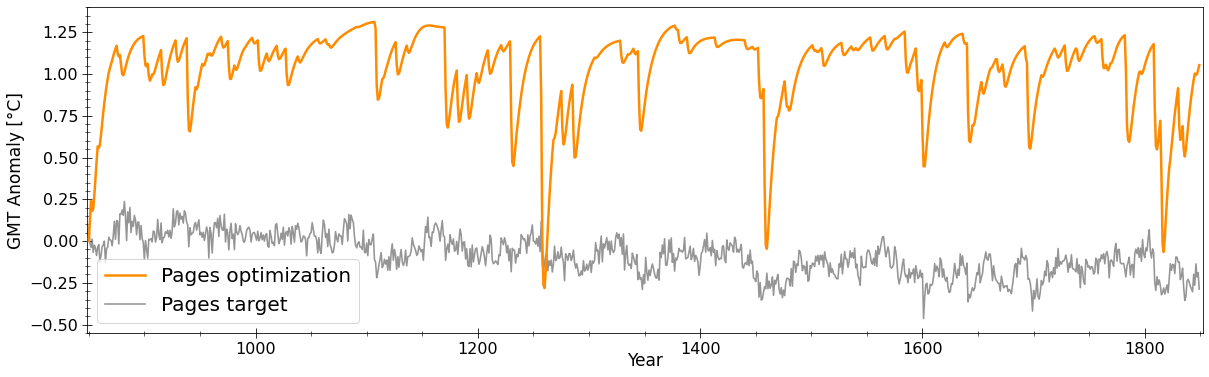

In [28]:
plt.figure(figsize=(20,6))
plt.plot(Time_Pages,GMT_Pages[:,0],linewidth=2.5,alpha=1,color='darkorange',label='Pages optimization',zorder=5)
plt.plot(Time_Pages,Target_Pages,color='dimgray',linewidth=1.6,alpha=.7, label='Pages target')
plt.xlim(848,1852)
plt.ylabel('GMT Anomaly [°C]',fontsize=17)
plt.xlabel('Year',fontsize=17,labelpad=-5)
plt.legend(fontsize=20)
#plt.set_yticks([-2,-1.5,-1,-0.5,0.0])
#plt.set_ylim(-3,0.5)
#plt.savefig('../Latex/Figures/Response_opti.png',format='PNG',dpi=400,bbox_inches='tight',transparency=True)

In [11]:
P_HadCM3=np.genfromtxt('Experiments/Output/HadCM3_P_20_resp_1.txt', delimiter=',',unpack=True)
P_CESM=np.genfromtxt('Experiments/Output/CESM_P_20_resp_1.txt', delimiter=',',unpack=True)
P_Pages=np.genfromtxt('Experiments/Output/Pages_P_20_resp_1.txt', delimiter=',',unpack=True)

In [14]:
print(P_HadCM3[:,0])
print(P_CESM[:,0])
print(P_Pages[:,0])

[2.95907338e+08 2.04852752e+02 1.60771861e+00 1.16420403e+00
 1.16476467e+00 1.16250822e+00]
[4.20000000e+08 1.93676598e+02 1.30000000e+00 1.16102757e+00
 1.16255044e+00 1.14014856e+00]
[2.82364931e+08 2.01077610e+02 1.82437007e+00 1.16465496e+00
 1.16486652e+00 1.16353628e+00]


# Parameter Experiments

In [9]:
Ptest_HadCM3_paras=[]
Ptest_HadCM3_ZMT=[]
Ptest_HadCM3_GMT=[]
for i in range(6):
    data=np.genfromtxt('Experiments/parametertest/Parametertest_HadCM3_0.txt',delimiter=',')
    Ptest_HadCM3_paras.append(data[0])
    Ptest_HadCM3_ZMT.append(data[1:19])
    Ptest_HadCM3_GMT.append(data[20:])

In [10]:
np.array(Ptest_HadCM3_GMT).shape

(6, 12166, 2)